In [1]:
#! Python3
# by Jacob Kovach
# Confidential and Proprietary

import matplotlib.pyplot as plt, numpy as np, pandas as pd, pickle, spacy, re, os
from nltk import tokenize
from collections import Counter

# Utility for opening files to variables
def get_variables(file):
    with open(file, 'rb') as file:
        return pickle.load(file)
    
# Get common words and dataframe of transcripts
common_words = get_variables('/Users/jkovach/Downloads/earnings-call-transcripts/_common_word_list_500')
earnings_df = get_variables('/Users/jkovach/Downloads/earnings-call-transcripts/_call_df_500')
earnings_df = earnings_df.drop(['datetime', 'raw', 'filename', 'ticker', 'duration', 
                                'price_delta', 'raw_len', 'clean_len'], 1)
earnings_df.head()

,content,Movement
0,lady gentleman stand begin good morning welcom...,1
1,stand begin good morning lady gentleman welcom...,1
2,hello welcome quarter earning review today hos...,1
3,good day welcome announcement time participant...,2
4,good morning conference operator today time li...,1


Class Balance: [(0, 106), (1, 227), (2, 93)]


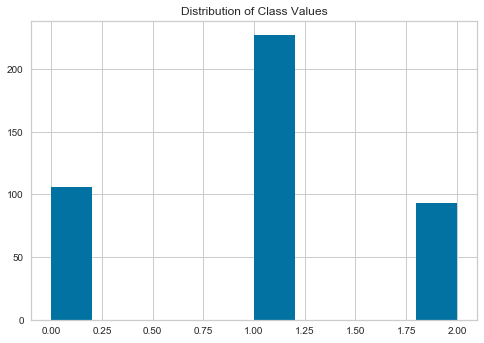

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


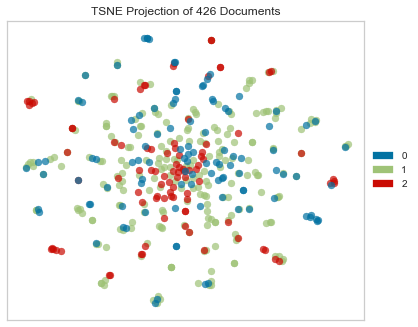

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from yellowbrick.text import TSNEVisualizer

# Declare raw feature text and labels and visualize distribution of classes
corpus = earnings_df['content']
labels = earnings_df['Movement']
print("Class Balance: {}".format(sorted(Counter(labels).items())))

plt.figure()
plt.hist(earnings_df.Movement)
plt.title("Distribution of Class Values")
plt.show()

# Load the data and create document vectors
vectorizer = TfidfVectorizer(min_df=4, 
                             stop_words=common_words, 
                             lowercase=True, 
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=True,
                             ngram_range=(1,4),
                            )

# Create visualizer and draw the vectors
X = vectorizer.fit_transform(corpus)
tsne = TSNEVisualizer()
tsne.fit(X, labels)
tsne.show()

In [3]:
#Apply the vectorizer and get number of features
earnings_tfidf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
print("Number of features: %d" % earnings_tfidf.shape[1])

#Reduce features from 1120 to 400, run SVD, then project the training data.
svd = TruncatedSVD(400)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_lsa = lsa.fit_transform(earnings_tfidf)

# Get the total explained variance after SVD
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:", total_variance*100)

# Covert to vectorizer results to dataframe
paras_by_component=pd.DataFrame(X_lsa, index=earnings_df['content'])
paras_by_component=paras_by_component.merge(earnings_df, on='content')
paras_by_component.head()

Number of features: 1120
Percent variance captured by all components: 99.5825442748123


,content,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,Movement
0,lady gentleman stand begin good morning welcom...,0.038242,0.150181,-0.017869,0.017976,-0.116546,-0.022094,-0.021485,0.120223,-0.093868,...,-0.041996,-0.048331,-0.017774,0.050745,-0.009412,0.012287,0.021848,-0.020934,-0.025950,1
1,stand begin good morning lady gentleman welcom...,0.039292,0.157514,-0.009731,-0.005892,-0.121618,-0.019412,-0.134514,-0.071755,0.156002,...,-0.002634,-0.003715,-0.002923,0.001124,-0.011619,0.010561,0.010993,0.013660,-0.008273,1
2,hello welcome quarter earning review today hos...,0.041652,0.158070,0.018517,-0.018288,-0.071065,0.001806,-0.099670,-0.000641,0.074231,...,0.006105,0.022046,0.005938,0.001579,0.022769,0.001220,-0.016167,-0.001099,-0.002511,1
3,good day welcome announcement time participant...,0.020381,0.101027,0.000020,0.000938,-0.070863,0.014405,-0.079821,-0.047721,0.052917,...,0.015256,0.005664,0.003790,-0.002463,0.003985,0.009998,-0.000895,0.009421,0.026979,2
4,good morning conference operator today time li...,0.042405,0.180496,-0.021478,0.022253,-0.086612,-0.006971,-0.098475,-0.053657,0.059234,...,-0.011332,-0.031880,0.005260,0.005868,0.010789,-0.018489,0.016264,-0.006959,-0.011245,1


Using TensorFlow backend.


Class Balance: [(0, 155), (1, 155), (2, 155)]


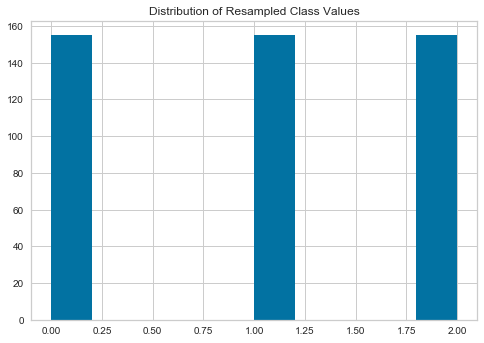

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


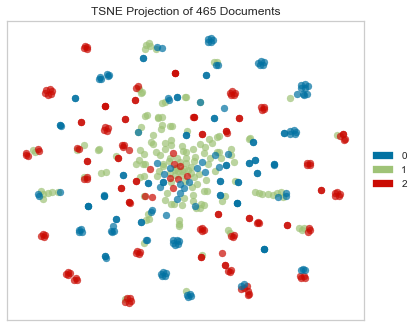

In [4]:
from imblearn.over_sampling import RandomOverSampler 

# Global variables for sampler and split functions
sample_split=0.3
sampler_state = 42

y = paras_by_component['Movement']
X = paras_by_component.drop(['content', 'Movement'], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=sample_split,
                                                    random_state=0)

# Instantiate random oversampler and fit the training data
ros = RandomOverSampler(random_state=sampler_state)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train)

# Recheck Class Balance
print("Class Balance: {}".format(sorted(Counter(y_train_res).items())))

plt.figure()
plt.hist(y_train_res)
plt.title("Distribution of Resampled Class Values")
plt.show()

# Visualizer vectors for balanced classes
tsne = TSNEVisualizer()
tsne.fit(X_train_res, y_train_res)
tsne.show()

In [5]:
from sklearn import ensemble
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

# Model selection #1: Random Forest
folds=5
rfc_params = {'n_estimators': 300,
              'max_depth': 5, 
              'max_features': 40}

rfc = ensemble.RandomForestClassifier(**rfc_params)
rfc.fit(X_train_res, y_train_res)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train_res, y_train_res))
print('\nTest set score:', rfc.score(X_test, y_test))
print(cross_val_score(rfc, X_test, y_test, cv=folds))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Training set score: 0.9935483870967742

Test set score: 0.671875
[0.55555556 0.61538462 0.56       0.6        0.6       ]
              precision    recall  f1-score   support

           0       0.56      0.19      0.29        26
           1       0.70      0.82      0.76        72
           2       0.63      0.73      0.68        30

    accuracy                           0.67       128
   macro avg       0.63      0.58      0.57       128
weighted avg       0.66      0.67      0.64       128

[[ 5 17  4]
 [ 4 59  9]
 [ 0  8 22]]


In [6]:
# Model selection #2: Gradient Boosting Classifier
gbc_params = {'n_estimators': 10000,
              'learning_rate': 0.005,
              'max_depth': 3, 
              'max_features': 5}

clf = ensemble.GradientBoostingClassifier(**gbc_params)
train = clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

print('Training set score:', clf.score(X_train_res, y_train_res))
print('\nTest set score:', clf.score(X_test, y_test))
print(cross_val_score(clf, X_test, y_test, cv=folds))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Training set score: 1.0

Test set score: 0.625
[0.55555556 0.57692308 0.56       0.6        0.6       ]
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        26
           1       0.62      0.90      0.73        72
           2       0.85      0.37      0.51        30

    accuracy                           0.62       128
   macro avg       0.62      0.47      0.49       128
weighted avg       0.63      0.62      0.58       128

[[ 4 22  0]
 [ 5 65  2]
 [ 1 18 11]]


In [7]:
from sklearn.linear_model import LogisticRegression

#Model selection #3: Logistic Regression
lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
train = lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)

print('Training set score:', lr.score(X_train_res, y_train_res))
print('\nTest set score:', lr.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Training set score: 0.9139784946236559

Test set score: 0.6875
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        26
           1       0.76      0.71      0.73        72
           2       0.68      0.77      0.72        30

    accuracy                           0.69       128
   macro avg       0.65      0.67      0.66       128
weighted avg       0.69      0.69      0.69       128

[[14 10  2]
 [12 51  9]
 [ 1  6 23]]


/Users/jkovach/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
from sklearn.svm import LinearSVC

# Model selection #1: Linear Support Vector Classifier
lsvc = LinearSVC(loss='hinge')
train = lsvc.fit(X_train_res, y_train_res)
y_pred = lsvc.predict(X_test)

print('Training set score:', lsvc.score(X_train_res, y_train_res))
print('\nTest set score:', lsvc.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Training set score: 0.9720430107526882

Test set score: 0.625
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.67      0.75      0.71        72
           2       0.59      0.57      0.58        30

    accuracy                           0.62       128
   macro avg       0.58      0.55      0.56       128
weighted avg       0.61      0.62      0.62       128

[[ 9 15  2]
 [ 8 54 10]
 [ 1 12 17]]
